#step-1:Data Preprocessing Steps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import warnings

sns.set()
warnings.filterwarnings('ignore')


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Provide the path to your CSV file in Google Drive
csv_file_path = '/content/drive/MyDrive/companies.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read the CSV file using Pandas
data = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
data.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [4]:
print("Missing Values:\n", data.isnull().sum().sort_values(ascending=False))

Missing Values:
 parent_id              196553
ROI                    195827
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
closed_at              193933
short_description      189422
funding_total_usd      168679
last_funding_at        165046
first_funding_at       165046
funding_rounds         164846
state_code             145650
twitter_username       115962
tag_list               115101
lat                    112701
lng                    112701
city                   112663
country_code           108563
founded_at             105326
first_milestone_at     104854
milestones             104854
last_milestone_at      104854
description            104505
logo_height             86443
logo_width              86443
logo_url                86443
category_code           73367
homepage_url            70008
domain                  70008
overview                69582
relationships           66886
created_by             

In [5]:
data.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [6]:
data.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [7]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

#Data Cleaning

1. Delete irrelevant & redundant information
2. Remove noise or unreliable data (missing values and outliers).

#1. Delete irrelevant and redundant information

 a. Delete 'region','city','state_code' as they provide too much of granularity.

 b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
   'created_at', 'updated_at' as they are redundant.

 c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
    'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
    'invested_companies' as they are irrelevant features.

 d. Delete duplicate values if any.

 e. Delete those which has more than 98% of null values.

#2. Remove noise or unreliable data (missing values and outliers)

 a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.

 b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

 c. Delete contradictory (mutually opposed or inconsistent data).

a. Delete 'region','city' as they provide too much of granularity.

In [8]:
data.drop(['region', 'city'], axis=1, inplace=True)

b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [9]:

data.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], axis=1, inplace=True)

c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [10]:
data.drop(['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview', 'tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], axis=1, inplace=True)

d.Delete duplicate values if any.

In [11]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

e.Delete those which has more than 98% of null values.

In [13]:
print((data.isnull().mean()*100).sort_values(ascending=False))

ROI                    99.337736
last_investment_at     97.950266
first_investment_at    97.950266
investment_rounds      97.946618
closed_at              97.610925
funding_total_usd      74.584033
first_funding_at       71.290958
last_funding_at        71.290958
funding_rounds         71.109429
state_code             55.029008
first_milestone_at     48.810479
last_milestone_at      48.810479
milestones             48.810479
relationships          31.484894
lat                    25.953258
lng                    25.953258
founded_at             24.667956
country_code           22.686638
category_code          11.182770
status                  0.000000
dtype: float64


In [14]:
# drop down the column ROI

data.drop('ROI', axis=1, inplace=True)
data.drop("first_investment_at",axis=1,inplace=True)
data.drop("last_investment_at",axis=1,inplace=True)
data.drop("investment_rounds",axis=1,inplace=True)

2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
(Since these are the type of data where adding value via imputation will create wrong pattern only)

In [15]:
data.dropna(subset=['status', 'country_code', 'category_code', 'founded_at'], inplace=True)


In [16]:
print("Columns with their respective null values\n")
print(data.isnull().sum().sort_values(ascending=False))

Columns with their respective null values

closed_at             61955
funding_total_usd     43149
first_funding_at      40867
last_funding_at       40867
funding_rounds        40727
first_milestone_at    28367
last_milestone_at     28367
milestones            28367
state_code            27231
relationships         15310
lat                    2397
lng                    2397
category_code             0
status                    0
founded_at                0
country_code              0
dtype: int64


2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

In [17]:
import pandas as pd
def find_outliers_zscore(column):
    threshold = 3
    z_scores = (column - column.mean()) / column.std()
    outliers = (z_scores.abs() > threshold)
    return outliers
outliers_funding_total_usd = find_outliers_zscore(data['funding_total_usd'])
outliers_funding_rounds = find_outliers_zscore(data['funding_rounds'])
print("Outliers in 'funding_total_usd':")
print(data[outliers_funding_total_usd])
print("\nOutliers in 'funding_rounds':")
print(data[outliers_funding_rounds])


Outliers in 'funding_total_usd':
         category_code     status  founded_at closed_at country_code  \
425     transportation  operating  2005-01-01       NaN          USA   
1426         education        ipo  2005-01-01       NaN          USA   
1434         ecommerce        ipo  1983-01-01       NaN          USA   
2225               web        ipo  2008-11-11       NaN          USA   
2971            social        ipo  2006-03-21       NaN          USA   
...                ...        ...         ...       ...          ...   
195137        hardware  operating  1999-01-01       NaN          USA   
195498          travel  operating  2007-01-01       NaN          USA   
195651        software  operating  2006-07-01       NaN          NZL   
196252        security        ipo  2005-01-01       NaN          USA   
196496     games_video   acquired  2004-01-01       NaN          CHN   

       state_code first_funding_at last_funding_at  funding_rounds  \
425            CA       2007-09-

If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

1. Find the IQR (Interquartile Range)
2. Find the upper and lower limit
3. Find outliers
4. Drop them
5. Compare the plots after trimming

In [18]:
import pandas as pd
def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = (column < lower_limit) | (column > upper_limit)
    return outliers

outliers_funding_total_usd_iqr = remove_outliers_iqr(data['funding_total_usd'])
outliers_funding_rounds_iqr = remove_outliers_iqr(data['funding_rounds'])
common_outliers = outliers_funding_total_usd_iqr & outliers_funding_rounds_iqr
data_no_outliers = data[~common_outliers]
print("Before Trimming:")
print(data.describe())
print("\nAfter Trimming:")
print(data_no_outliers.describe())


Before Trimming:
       funding_rounds  funding_total_usd   milestones  relationships  \
count    22889.000000       2.046700e+04  35249.00000   48306.000000   
mean         1.805758       1.582132e+07      1.41587       4.442926   
std          1.310805       6.990693e+07      0.73856      13.266474   
min          1.000000       2.910000e+02      1.00000       1.000000   
25%          1.000000       5.110380e+05      1.00000       1.000000   
50%          1.000000       2.725875e+06      1.00000       2.000000   
75%          2.000000       1.200000e+07      2.00000       4.000000   
max         15.000000       5.700000e+09      9.00000    1189.000000   

                lat           lng  
count  61219.000000  61219.000000  
mean      37.293151    -50.708830  
std       15.812771     70.783600  
min      -50.942326   -159.485278  
25%       34.052234   -112.028750  
50%       39.739236    -75.898684  
75%       45.417979      1.801799  
max       77.553604    176.165130  

After Tri

#B. Date Transformation

## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

In [19]:
####Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [20]:
print("Columns with their respective null values\n")
print(data.isnull().sum().sort_values(ascending=False))

data.info()

Columns with their respective null values

closed_at             61955
funding_total_usd     43149
first_funding_at      40867
last_funding_at       40867
funding_rounds        40727
first_milestone_at    28367
last_milestone_at     28367
milestones            28367
state_code            27231
relationships         15310
lat                    2397
lng                    2397
category_code             0
status                    0
founded_at                0
country_code              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63616 entries, 0 to 196552
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_code       63616 non-null  object 
 1   status              63616 non-null  object 
 2   founded_at          63616 non-null  object 
 3   closed_at           1661 non-null   object 
 4   country_code        63616 non-null  object 
 5   state_code          36385 non-null  ob

In [21]:
data.describe()

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,22889.000000,2.046700e+04,35249.00000,48306.000000,61219.000000,61219.000000
mean,1.805758,1.582132e+07,1.41587,4.442926,37.293151,-50.708830
std,1.310805,6.990693e+07,0.73856,13.266474,15.812771,70.783600
min,1.000000,2.910000e+02,1.00000,1.000000,-50.942326,-159.485278
25%,1.000000,5.110380e+05,1.00000,1.000000,34.052234,-112.028750
50%,1.000000,2.725875e+06,1.00000,2.000000,39.739236,-75.898684
75%,2.000000,1.200000e+07,2.00000,4.000000,45.417979,1.801799
max,15.000000,5.700000e+09,9.00000,1189.000000,77.553604,176.165130


In [22]:
#founded_at
data['founded_at'] = data['founded_at'].fillna('2021')
data['founded_at'] = data['founded_at'].astype(str)
data['founded_at'] = data['founded_at'].str[0:4].astype(int)

	#closed at
data['closed_at'] = data['closed_at'].fillna('2021')
data['closed_at'] = data['closed_at'].astype(str)
data['closed_at'] = data['closed_at'].str[0:4].astype(int)

#first_funding_at
data['first_funding_at'] = data['first_funding_at'].fillna('2021')
data['first_funding_at'] = data['first_funding_at'].astype(str)
data['first_funding_at'] = data['first_funding_at'].str[0:4].astype(int)


#last_funding_at
data['last_funding_at'] = data['last_funding_at'].fillna('2021')
data['last_funding_at'] = data['last_funding_at'].astype(str)
data['last_funding_at'] = data['last_funding_at'].str[0:4].astype(int)


#first_milestone_at
data['first_milestone_at'] = data['first_milestone_at'].fillna('2021')
data['first_milestone_at'] = data['first_milestone_at'].astype(str)
data['first_milestone_at'] = data['first_milestone_at'].str[0:4].astype(int)

#last_milestone_at
data['last_milestone_at'] = data['last_milestone_at'].fillna('2021')
data['last_milestone_at'] = data['last_milestone_at'].astype(str)
data['last_milestone_at'] = data['last_milestone_at'].str[0:4].astype(int)

In [23]:
data.head()

,category_code,status,founded_at,closed_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005,2021,USA,WA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007,2021,MAR,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008,2021,IND,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,2021,USA,NM,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007,2021,USA,CA,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851


In [24]:
print("Count of unique values in category_code column:", data['category_code'].nunique())
print("Count of unique values in country_code column:", data['country_code'].nunique())

Count of unique values in category_code column: 42
Count of unique values in country_code column: 165


In [25]:
# check the number of country code and category_code values

print("Values of country code")
print(data.country_code.unique())
print("Values of category_code")
print(data.category_code.unique())

Values of country code
['USA' 'MAR' 'IND' 'AUS' 'FRA' 'JPN' 'NLD' 'EGY' 'ISR' 'GBR' 'THA' 'AUT'
 'IRL' 'SWE' 'DEU' 'BRA' 'FIN' 'RUS' 'SGP' 'MEX' 'CHN' 'ESP' 'ISL' 'KOR'
 'TUR' 'DNK' 'PAK' 'HUN' 'CAN' 'POL' 'GRC' 'PRT' 'BLR' 'CSS' 'MKD' 'ARG'
 'CHE' 'UKR' 'ITA' 'NZL' 'CZE' 'VNM' 'NOR' 'HRV' 'BEN' 'CHL' 'GHA' 'ZAF'
 'MYS' 'EST' 'BEL' 'SVK' 'TWN' 'CRI' 'HKG' 'BGD' 'BOL' 'LBN' 'LUX' 'COL'
 'PHL' 'ARE' 'IDN' 'ROM' 'ANT' 'NGA' 'LKA' 'SWZ' 'VGB' 'MLT' 'SAU' 'KEN'
 'BGR' 'PER' 'LVA' 'CYP' 'LAO' 'NPL' 'MDA' 'CMR' 'UGA' 'TUN' 'URY' 'MUS'
 'VEN' 'OMN' 'ECU' 'KWT' 'JOR' 'LTU' 'ALB' 'SVN' 'QAT' 'PST' 'REU' 'GTM'
 'PCN' 'BHS' 'GEO' 'BWA' 'DZA' 'GRD' 'GIB' 'PAN' 'MTQ' 'PRI' 'BIH' 'DMA'
 'BHR' 'SYC' 'SLE' 'TTO' 'VCT' 'ARA' 'BRB' 'NAM' 'SLV' 'AFG' 'BLZ' 'UZB'
 'CYM' 'LIE' 'IRN' 'ARM' 'ATG' 'UMI' 'DOM' 'MDV' 'MMR' 'KAZ' 'JAM' 'GLP'
 'IOT' 'MDG' 'VIR' 'AZE' 'TZA' 'ZWE' 'PRY' 'PRK' 'SMR' 'IRQ' 'BMU' 'NRU'
 'ETH' 'BDI' 'SEN' 'NCL' 'CUB' 'FST' 'AGO' 'NFK' 'AND' 'MCO' 'ZMB' 'KGZ'
 'YEM' 'BRN' 'HTI' 'SUR' 'SY

In [26]:
# print no of vlaues of each in above

print("Number of values in country_code")
print(data.country_code.value_counts())
print("Number of values in category_code")
print(data.category_code.value_counts())


Number of values in country_code
USA    36804
GBR     5101
IND     3020
CAN     2689
DEU     1409
       ...  
BEN        1
PCN        1
MDG        1
IOT        1
SDN        1
Name: country_code, Length: 165, dtype: int64
Number of values in category_code
software            11367
web                  7948
ecommerce            4986
other                4741
mobile               3926
advertising          3756
games_video          2919
consulting           2808
enterprise           2773
biotech              2534
public_relations     1595
hardware             1557
network_hosting      1349
education            1191
search               1008
cleantech            1002
analytics             749
finance               705
social                686
security              683
health                649
medical               500
semiconductor         469
legal                 367
travel                347
news                  309
manufacturing         308
fashion               296
hospitality     

In [27]:
# replace all the values of category_code after 15th category with Others

data['category_code'].replace(data['category_code'].value_counts().index[15:],'Others',inplace=True)

In [28]:
print("Number of values in category_code")
print(data.category_code.value_counts())

Number of values in category_code
software            11367
Others               9158
web                  7948
ecommerce            4986
other                4741
mobile               3926
advertising          3756
games_video          2919
consulting           2808
enterprise           2773
biotech              2534
public_relations     1595
hardware             1557
network_hosting      1349
education            1191
search               1008
Name: category_code, dtype: int64


#Let's encode 'country' column now.

In [29]:

 # replace country_code after 15th count with others

data['country_code'].replace(data['country_code'].value_counts().index[15:],'Others',inplace=True)
print("Number of values in country_code")
print(data.country_code.value_counts())

Number of values in country_code
USA       36804
Others     7515
GBR        5101
IND        3020
CAN        2689
DEU        1409
FRA        1262
AUS        1039
ESP         896
ISR         806
NLD         670
IRL         504
CHN         479
ITA         479
SWE         473
BRA         470
Name: country_code, dtype: int64


   ## 2. Create new variables

In [30]:
# a. Create new feature 'isClosed'
data['isClosed'] = (data['status'] == 'closed') | (~data['closed_at'].isnull())

In [31]:
data['status'].value_counts()

operating    57478
acquired      3897
closed        1629
ipo            612
Name: status, dtype: int64

In [32]:
isClosed=[]

for index,row in data.iterrows():
  if row['status'] == 'operating' or row['status'] == 'ipo' :
    result=1
    isClosed.append(result)
  elif row['status'] =='acquired' or row['status'] =='closed' :
    result2=0
    isClosed.append(result2)

data['isClosed'] = isClosed

In [33]:
data.head()

,category_code,status,founded_at,closed_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed
0,web,operating,2005,2021,USA,WA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,1
5,advertising,operating,2007,2021,Others,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107,1
6,Others,operating,2008,2021,IND,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219,1
12,advertising,operating,2008,2021,USA,NM,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799,1
13,web,acquired,2007,2021,USA,CA,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,0


2b.Create active_days
 1. Replacing values:
     -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
     - Where as if the value is 'acquired' or 'closed', let's put 0.
 2. Subtract founded_date from closed_date, and calculate age in days (After calculating active days,
     check contradictory issues we didn't check it before).

2.b.i Replacing the values in closed_at_year column
if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
Where as if the value is 'acquired' or 'closed', let's put 0.

Replacing the values in closed_at_year column
if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
Where as if the value is 'acquired' or 'closed', let's put 0.

In [34]:
# Applying the condition
data.loc[data.status == "operating", "closed_at_year"] = 2021
data.loc[data.status == "ipo", "closed_at_year"] = 2021
data.loc[data.status == "closed", "closed_at_year"] = 0
data.loc[data.status == "acquired", "closed_at_year"] = 0

In [35]:
data.head()

,category_code,status,founded_at,closed_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,closed_at_year
0,web,operating,2005,2021,USA,WA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,1,2021.0
5,advertising,operating,2007,2021,Others,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107,1,2021.0
6,Others,operating,2008,2021,IND,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219,1,2021.0
12,advertising,operating,2008,2021,USA,NM,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799,1,2021.0
13,web,acquired,2007,2021,USA,CA,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,0,0.0


In [36]:
print("Columns with their respective null values\n")
print(data.isnull().sum().sort_values(ascending=False))

Columns with their respective null values

funding_total_usd     43149
funding_rounds        40727
milestones            28367
state_code            27231
relationships         15310
lng                    2397
lat                    2397
first_milestone_at        0
isClosed                  0
last_milestone_at         0
category_code             0
status                    0
last_funding_at           0
first_funding_at          0
country_code              0
closed_at                 0
founded_at                0
closed_at_year            0
dtype: int64


In [37]:
(data.isnull().sum()/len(data))*100

category_code          0.000000
status                 0.000000
founded_at             0.000000
closed_at              0.000000
country_code           0.000000
state_code            42.805269
first_funding_at       0.000000
last_funding_at        0.000000
funding_rounds        64.020058
funding_total_usd     67.827276
first_milestone_at     0.000000
last_milestone_at      0.000000
milestones            44.590983
relationships         24.066273
lat                    3.767920
lng                    3.767920
isClosed               0.000000
closed_at_year         0.000000
dtype: float64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63616 entries, 0 to 196552
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_code       63616 non-null  object 
 1   status              63616 non-null  object 
 2   founded_at          63616 non-null  int64  
 3   closed_at           63616 non-null  int64  
 4   country_code        63616 non-null  object 
 5   state_code          36385 non-null  object 
 6   first_funding_at    63616 non-null  int64  
 7   last_funding_at     63616 non-null  int64  
 8   funding_rounds      22889 non-null  float64
 9   funding_total_usd   20467 non-null  float64
 10  first_milestone_at  63616 non-null  int64  
 11  last_milestone_at   63616 non-null  int64  
 12  milestones          35249 non-null  float64
 13  relationships       48306 non-null  float64
 14  lat                 61219 non-null  float64
 15  lng                 61219 non-null  float64
 16  isC

In [39]:
data.head()

,category_code,status,founded_at,closed_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,closed_at_year
0,web,operating,2005,2021,USA,WA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,1,2021.0
5,advertising,operating,2007,2021,Others,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107,1,2021.0
6,Others,operating,2008,2021,IND,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219,1,2021.0
12,advertising,operating,2008,2021,USA,NM,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799,1,2021.0
13,web,acquired,2007,2021,USA,CA,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,0,0.0


2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [40]:
data['Active_Days']=(data['closed_at']-data['founded_at'])*365.5

In [41]:
data.head()

,category_code,status,founded_at,closed_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,closed_at_year,Active_Days
0,web,operating,2005,2021,USA,WA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,1,2021.0,5848.0
5,advertising,operating,2007,2021,Others,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107,1,2021.0,5117.0
6,Others,operating,2008,2021,IND,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219,1,2021.0,4751.5
12,advertising,operating,2008,2021,USA,NM,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799,1,2021.0,4751.5
13,web,acquired,2007,2021,USA,CA,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,0,0.0,5117.0


In [42]:
data = data[data['Active_Days'] >= 0]

In [43]:
data.head()

,category_code,status,founded_at,closed_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,closed_at_year,Active_Days
0,web,operating,2005,2021,USA,WA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,1,2021.0,5848.0
5,advertising,operating,2007,2021,Others,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107,1,2021.0,5117.0
6,Others,operating,2008,2021,IND,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219,1,2021.0,4751.5
12,advertising,operating,2008,2021,USA,NM,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799,1,2021.0,4751.5
13,web,acquired,2007,2021,USA,CA,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,0,0.0,5117.0


2.b.iii. Then, delete the closed_at_year column.

In [44]:
data=data.drop(columns=['closed_at'])

#working on target variable

In [45]:
# Applying the condition
data.loc[data.status == "operating", "status"] = "operating"
data.loc[data.status == "ipo", "status"] = "operating"
data.loc[data.status == "closed", "status"] = "not operating"
data.loc[data.status == "acquired", "status"] = "not operating"

In [46]:
data.drop('state_code', axis=1, inplace=True)

In [47]:
data.head()

,category_code,status,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,closed_at_year,Active_Days
0,web,operating,2005,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,1,2021.0,5848.0
5,advertising,operating,2007,Others,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107,1,2021.0,5117.0
6,Others,operating,2008,IND,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219,1,2021.0,4751.5
12,advertising,operating,2008,USA,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799,1,2021.0,4751.5
13,web,not operating,2007,USA,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,0,0.0,5117.0


In [48]:
data['status'].value_counts()

operating        58090
not operating     5513
Name: status, dtype: int64

#Remove the null vaues with the mean value in 'Numerical Data'

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63603 entries, 0 to 196552
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_code       63603 non-null  object 
 1   status              63603 non-null  object 
 2   founded_at          63603 non-null  int64  
 3   country_code        63603 non-null  object 
 4   first_funding_at    63603 non-null  int64  
 5   last_funding_at     63603 non-null  int64  
 6   funding_rounds      22879 non-null  float64
 7   funding_total_usd   20459 non-null  float64
 8   first_milestone_at  63603 non-null  int64  
 9   last_milestone_at   63603 non-null  int64  
 10  milestones          35243 non-null  float64
 11  relationships       48294 non-null  float64
 12  lat                 61207 non-null  float64
 13  lng                 61207 non-null  float64
 14  isClosed            63603 non-null  int64  
 15  closed_at_year      63603 non-null  float64
 16  Act

In [50]:
data['funding_rounds'].fillna(value=data['funding_rounds'].mean(), inplace=True)
data['funding_total_usd'].fillna(value=data['funding_total_usd'].mean(), inplace=True)
data['milestones'].fillna(value=data['milestones'].mean(), inplace=True)
data['relationships'].fillna(value=data['relationships'].mean(), inplace=True)
data['lat'].fillna(value=data['lat'].mean(), inplace=True)
data['lng'].fillna(value=data['lng'].mean(), inplace=True)
data['first_funding_at'].fillna(value=data['first_funding_at'].mean(), inplace=True)
data['last_funding_at'].fillna(value=data['last_funding_at'].mean(), inplace=True)
data['first_milestone_at'].fillna(value=data['first_milestone_at'].mean(), inplace=True)
data['last_milestone_at'].fillna(value=data['last_milestone_at'].mean(), inplace=True)

In [51]:
print("Columns with their respective null values\n")
print(data.isnull().sum().sort_values(ascending=False))

Columns with their respective null values

category_code         0
last_milestone_at     0
closed_at_year        0
isClosed              0
lng                   0
lat                   0
relationships         0
milestones            0
first_milestone_at    0
status                0
funding_total_usd     0
funding_rounds        0
last_funding_at       0
first_funding_at      0
country_code          0
founded_at            0
Active_Days           0
dtype: int64


In [52]:
#save the csv file

data.to_csv('cleaned_data.csv', index=False)

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your cleaned dataset is named 'data'
# If you have a different name, replace 'data' with your actual dataset name

# Univariate Analysis
def univariate_analysis(data):
    # Plot distribution of the target variable 'status'
    sns.countplot(x='status', data=data)
    plt.title('Distribution of Startup Status')
    plt.show()


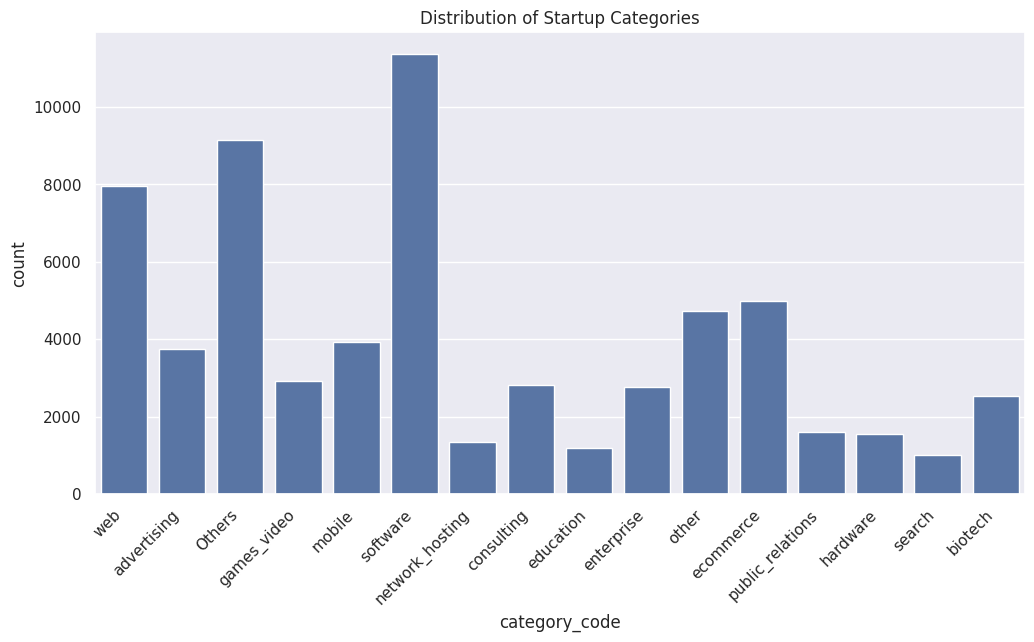

In [56]:
# Plot distribution of 'category_code'
plt.figure(figsize=(12, 6))
sns.countplot(x='category_code', data=data)
plt.title('Distribution of Startup Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

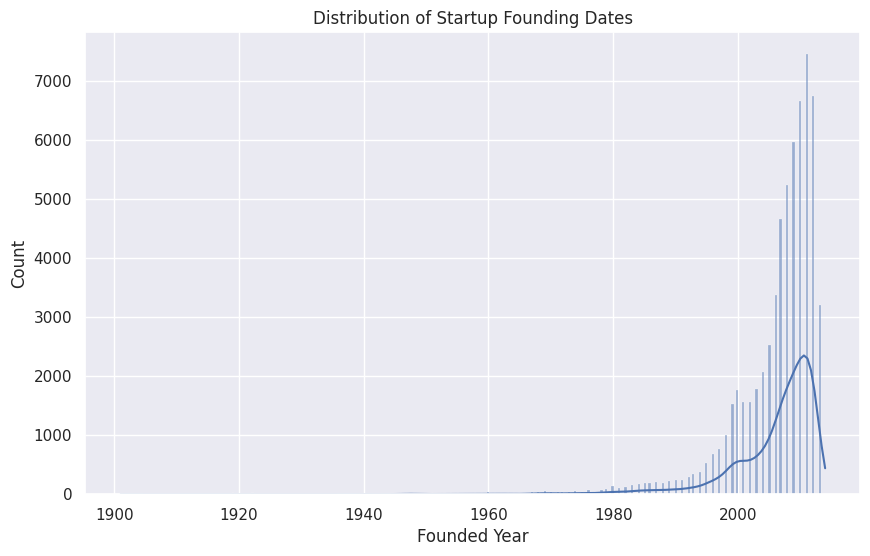

In [57]:
# Plot distribution of 'founded_at'
plt.figure(figsize=(10, 6))
sns.histplot(data['founded_at'], kde=True)
plt.title('Distribution of Startup Founding Dates')
plt.xlabel('Founded Year')
plt.show()

In [58]:
# Bivariate Analysis
def bivariate_analysis(data):
  plt.figure(figsize=(14, 8))
  sns.countplot(x='category_code', hue='status', data=data)
  plt.title('Relationship between Category and Startup Status')
  plt.xticks(rotation=45, ha='right')
  plt.show()


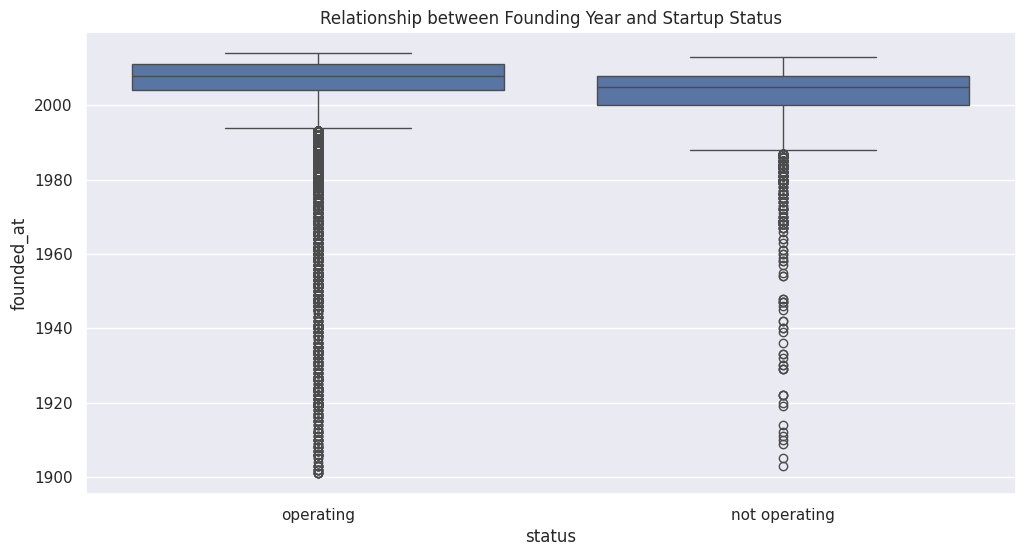

In [59]:
# Relationship between 'founded_at' and 'status'
plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='founded_at', data=data)
plt.title('Relationship between Founding Year and Startup Status')
plt.show()

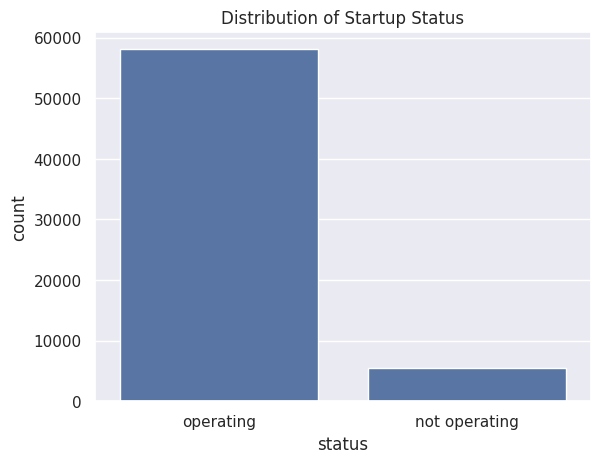

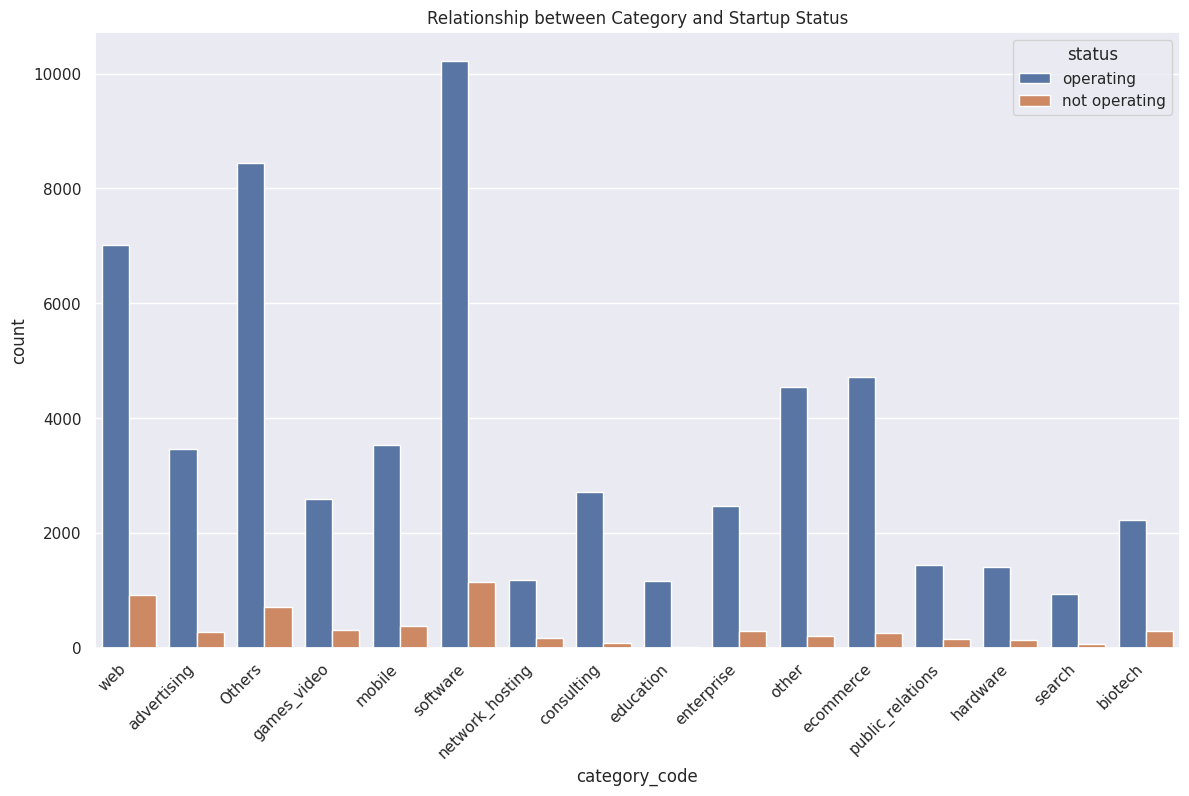

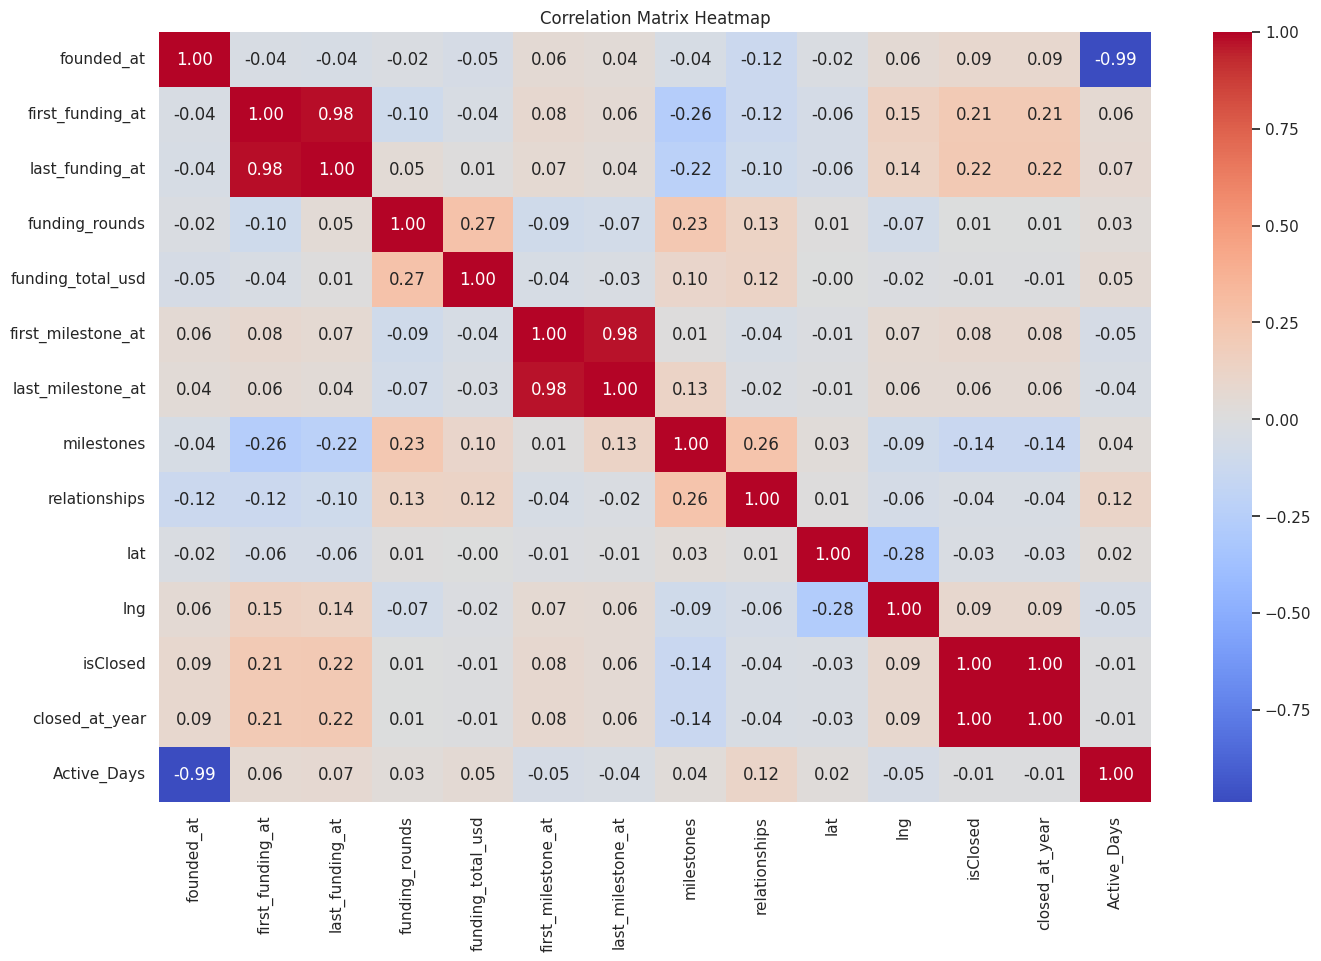

In [60]:
# Multivariate Analysis
def multivariate_analysis(data):
  plt.figure(figsize=(16, 10))
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
  plt.title('Correlation Matrix Heatmap')
  plt.show()

# Perform Univariate Analysis
univariate_analysis(data)

# Perform Bivariate Analysis
bivariate_analysis(data)

# Perform Multivariate Analysis
multivariate_analysis(data)